# GAN: - Generative Adversarial Networks

### In this Notebook first I will be adding stepwise intuition for creating GAN's.Then I will be Adding a class which summarises whole process in one go for how to create gans.
### Lets dive in:-

In [0]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import LeakyReLU,Reshape,Conv2DTranspose
from keras.layers import Dropout,Flatten,Activation,BatchNormalization,UpSampling2D

Using TensorFlow backend.


## Discriminator

In [0]:
model=Sequential()
model.add(Conv2D(64,5,strides=2,input_shape=(28,28,1),padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.4))
model.add(Conv2D(128,5,strides=2,padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.4))
model.add(Conv2D(256,5,strides=2,padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.4))
model.add(Conv2D(512,5,strides=1,padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

W0715 18:24:40.642872 140298994280320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 18:24:40.696887 140298994280320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 18:24:40.706491 140298994280320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 18:24:40.750139 140298994280320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0715 18:24:40.762369 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         819456    
__________

## Generators

Convolution auto encoder is used to extract features of images and when we train that autoencoder we can reconstruct that particular image.
Such an autoencoder has two parts: The encoder that extracts the features from the image and the decoder that reconstructs the original image from these features. The architecture of the encoder and decoder are usually mirrored.

The decoder tries to mirror the encoder but instead of "making everything smaller" it has the goal of "making everything bigger" to match the original size of the image. 

The opposite of the convolutional layers are the transposed convolution layers (also known as deconvolution, but correctly mathematically speaking this is something different). They work with filters, kernels, strides just as the convolution layers but instead of mapping from e.g. 3x3 input pixels to 1 output they map from 1 input pixel to 3x3 pixels.

The opposite of the pooling layers are the upsampling layers which in their purest form only resize the image (or copy the pixel as many times as needed). A more advanced technique is unpooling which resverts maxpooling by remembering the location of the maxima in the maxpooling layers and in the unpooling layers copy the value to exactly this location.

So we are preparing a conv net using the 100 vectored input.

In [0]:
model1=Sequential()
dropout=0.4
dim=7
depth=256
model1.add(Dense(dim*dim*depth,input_dim=100))
model1.add(BatchNormalization(momentum=0.9))
model1.add(Activation('relu'))
model1.add(Reshape((dim,dim,depth)))
model1.add(Dropout(dropout))
model1.add(UpSampling2D())
model1.add(Conv2DTranspose(int(depth/2),5,padding="same"))
model1.add(BatchNormalization(momentum=0.9))
model1.add(Activation('relu'))
model1.add(UpSampling2D())
model1.add(Conv2DTranspose(int(depth/4),5,padding="same"))
model1.add(BatchNormalization(momentum=0.9))
model1.add(Activation('relu'))
model1.add(Conv2DTranspose(int(depth/8),5,padding="same"))
model1.add(BatchNormalization(momentum=0.9))
model1.add(Activation('relu'))
model1.add(Conv2DTranspose(1,5,padding="same"))
model1.add(Activation('sigmoid'))
model1.summary()

W0715 18:24:46.356000 140298994280320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0715 18:24:46.480393 140298994280320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0715 18:24:49.417616 140298994280320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_1 (Batch (None, 12544)             50176     
_________________________________________________________________
activation_2 (Activation)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 256)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 128)       819328    
__________

In [0]:
from keras.datasets import mnist

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train.shape


(60000, 28, 28)

## Discriminator Model

In [0]:
optimizer=RMSprop(lr=0.0002,decay=6e-8)
modeldm=Sequential()
modeldm.add(model)
modeldm.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

W0715 18:25:07.320134 140298994280320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 18:25:07.334069 140298994280320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Adversarial Model

This model is stacked with both generator and discriminator with optimizer as rmsprop

In [0]:
optimizer=RMSprop(lr=0.0001,decay=3e-8)
ammodel=Sequential()
ammodel.add(model1)
ammodel.add(model)
ammodel.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

## Training

In [0]:
batch_size=256
from tensorflow.examples.tutorials.mnist import input_data
x_train = input_data.read_data_sets("mnist",one_hot=True).train.images
x_train = x_train.reshape(-1, 28,28, 1).astype(np.float32)

W0715 18:25:13.884310 140298994280320 deprecation.py:323] From <ipython-input-9-ba0c90b00f2c>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0715 18:25:13.886028 140298994280320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0715 18:25:13.893287 140298994280320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz


W0715 18:25:14.293852 140298994280320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0715 18:25:14.297456 140298994280320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0715 18:25:14.383380 140298994280320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [0]:
for i in range(100):
    images_train = x_train[np.random.randint(0,x_train.shape[0], size=batch_size), :, :, :]
    noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
    images_fake = model1.predict(noise)
    x = np.concatenate((images_train, images_fake))
    y = np.ones([2*batch_size, 1])
    y[batch_size:, :] = 0
    d_loss = modeldm.train_on_batch(x, y)
    y = np.ones([batch_size, 1])
    noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
    a_loss = ammodel.train_on_batch(noise, y)
    log_mesg = "%d: [D loss: %f, acc: %f]" % (i, d_loss[0], d_loss[1])
    log_mesg = "%s  [A loss: %f, acc: %f]" % (log_mesg, a_loss[0], a_loss[1])
    print(log_mesg)

0: [D loss: 0.693674, acc: 0.486328]  [A loss: 0.950565, acc: 0.000000]
1: [D loss: 0.694504, acc: 0.500000]  [A loss: 0.923198, acc: 0.000000]
2: [D loss: 0.652533, acc: 0.992188]  [A loss: 0.824416, acc: 0.000000]
3: [D loss: 0.656199, acc: 0.500000]  [A loss: 1.124502, acc: 0.000000]
4: [D loss: 0.578627, acc: 0.951172]  [A loss: 1.003167, acc: 0.000000]
5: [D loss: 0.482461, acc: 0.998047]  [A loss: 1.187002, acc: 0.000000]
6: [D loss: 0.516870, acc: 0.527344]  [A loss: 1.605132, acc: 0.000000]
7: [D loss: 0.554634, acc: 0.935547]  [A loss: 0.946895, acc: 0.000000]
8: [D loss: 0.465390, acc: 0.556641]  [A loss: 1.320466, acc: 0.000000]
9: [D loss: 0.392064, acc: 0.998047]  [A loss: 1.046798, acc: 0.000000]
10: [D loss: 0.545845, acc: 0.503906]  [A loss: 1.749650, acc: 0.000000]
11: [D loss: 0.436377, acc: 0.955078]  [A loss: 1.193677, acc: 0.000000]
12: [D loss: 0.319266, acc: 1.000000]  [A loss: 1.170290, acc: 0.000000]
13: [D loss: 0.376133, acc: 0.759766]  [A loss: 1.523629, acc

_________________________________________________________________________________________________________________________

# Here is The full summarised code for MNIST Dataset for 10,000 epochs

_________________________________________________________________________________________________________________________

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None

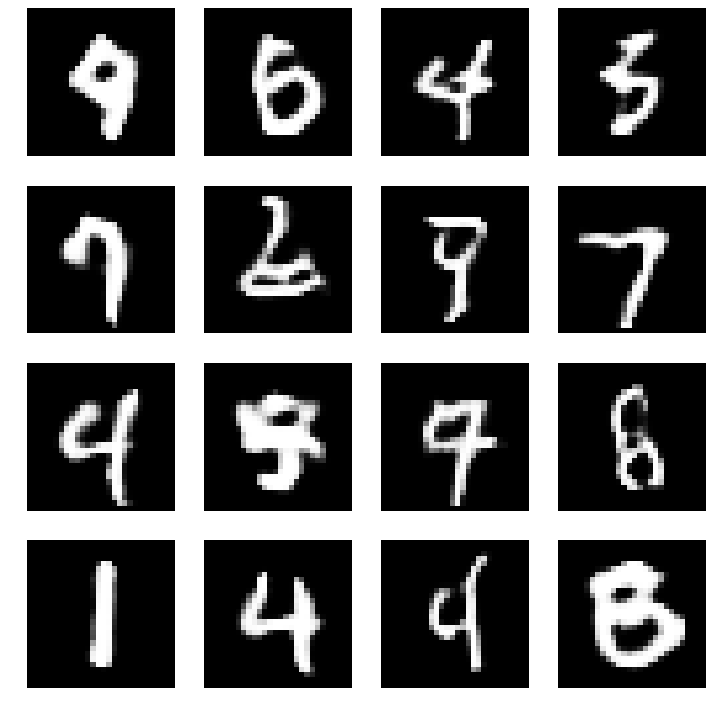

In [0]:

import numpy as np
import time
from tensorflow.examples.tutorials.mnist import input_data

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import LeakyReLU, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop

import matplotlib.pyplot as plt

class ElapsedTimer(object):
    def __init__(self):
        self.start_time = time.time()
    def elapsed(self,sec):
        if sec < 60:
            return str(sec) + " sec"
        elif sec < (60 * 60):
            return str(sec / 60) + " min"
        else:
            return str(sec / (60 * 60)) + " hr"
    def elapsed_time(self):
        print("Elapsed: %s " % self.elapsed(time.time() - self.start_time) )

class DCGAN(object):
    def __init__(self, img_rows=28, img_cols=28, channel=1):

        self.img_rows = img_rows
        self.img_cols = img_cols
        self.channel = channel
        self.D = None   # discriminator
        self.G = None   # generator
        self.AM = None  # adversarial model
        self.DM = None  # discriminator model

    # (Wâˆ’F+2P)/S+1
    def discriminator(self):
        if self.D:
            return self.D
        self.D = Sequential()
        depth = 64
        dropout = 0.4
        # In: 28 x 28 x 1, depth = 1
        # Out: 14 x 14 x 1, depth=64
        input_shape = (self.img_rows, self.img_cols, self.channel)
        self.D.add(Conv2D(depth*1, 5, strides=2, input_shape=input_shape,\
            padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*2, 5, strides=2, padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*4, 5, strides=2, padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*8, 5, strides=1, padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        # Out: 1-dim probability
        self.D.add(Flatten())
        self.D.add(Dense(1))
        self.D.add(Activation('sigmoid'))
        self.D.summary()
        return self.D

    def generator(self):
        if self.G:
            return self.G
        self.G = Sequential()
        dropout = 0.4
        depth = 64+64+64+64
        dim = 7
        # In: 100
        # Out: dim x dim x depth
        self.G.add(Dense(dim*dim*depth, input_dim=100))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))
        self.G.add(Reshape((dim, dim, depth)))
        self.G.add(Dropout(dropout))

        # In: dim x dim x depth
        # Out: 2*dim x 2*dim x depth/2
        self.G.add(UpSampling2D())
        self.G.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))

        self.G.add(UpSampling2D())
        self.G.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))

        self.G.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))

        # Out: 28 x 28 x 1 grayscale image [0.0,1.0] per pix
        self.G.add(Conv2DTranspose(1, 5, padding='same'))
        self.G.add(Activation('sigmoid'))
        self.G.summary()
        return self.G

    def discriminator_model(self):
        if self.DM:
            return self.DM
        optimizer = RMSprop(lr=0.0002, decay=6e-8)
        self.DM = Sequential()
        self.DM.add(self.discriminator())
        self.DM.compile(loss='binary_crossentropy', optimizer=optimizer,\
            metrics=['accuracy'])
        return self.DM

    def adversarial_model(self):
        if self.AM:
            return self.AM
        optimizer = RMSprop(lr=0.0001, decay=3e-8)
        self.AM = Sequential()
        self.AM.add(self.generator())
        self.AM.add(self.discriminator())
        self.AM.compile(loss='binary_crossentropy', optimizer=optimizer,\
            metrics=['accuracy'])
        return self.AM

class MNIST_DCGAN(object):
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channel = 1

        self.x_train = input_data.read_data_sets("mnist",\
        	one_hot=True).train.images
        self.x_train = self.x_train.reshape(-1, self.img_rows,\
        	self.img_cols, 1).astype(np.float32)

        self.DCGAN = DCGAN()
        self.discriminator =  self.DCGAN.discriminator_model()
        self.adversarial = self.DCGAN.adversarial_model()
        self.generator = self.DCGAN.generator()

    def train(self, train_steps=2000, batch_size=256, save_interval=0):
        noise_input = None
        if save_interval>0:
            noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
        for i in range(train_steps):
            images_train = self.x_train[np.random.randint(0,
                self.x_train.shape[0], size=batch_size), :, :, :]
            noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
            images_fake = self.generator.predict(noise)
            x = np.concatenate((images_train, images_fake))
            y = np.ones([2*batch_size, 1])
            y[batch_size:, :] = 0
            d_loss = self.discriminator.train_on_batch(x, y)

            y = np.ones([batch_size, 1])
            noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
            a_loss = self.adversarial.train_on_batch(noise, y)
            log_mesg = "%d: [D loss: %f, acc: %f]" % (i, d_loss[0], d_loss[1])
            log_mesg = "%s  [A loss: %f, acc: %f]" % (log_mesg, a_loss[0], a_loss[1])
            print(log_mesg)
            if save_interval>0:
                if (i+1)%save_interval==0:
                    self.plot_images(save2file=True, samples=noise_input.shape[0],\
                        noise=noise_input, step=(i+1))

    def plot_images(self, save2file=False, fake=True, samples=16, noise=None, step=0):
        filename = 'mnist.png'
        if fake:
            if noise is None:
                noise = np.random.uniform(-1.0, 1.0, size=[samples, 100])
            else:
                filename = "mnist_%d.png" % step
            images = self.generator.predict(noise)
        else:
            i = np.random.randint(0, self.x_train.shape[0], samples)
            images = self.x_train[i, :, :, :]

        plt.figure(figsize=(10,10))
        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i, :, :, :]
            image = np.reshape(image, [self.img_rows, self.img_cols])
            plt.imshow(image, cmap='gray')
            plt.axis('off')
        plt.tight_layout()
        if save2file:
            plt.savefig(filename)
            plt.close('all')
        else:
            plt.show()

if __name__ == '__main__':
    mnist_dcgan = MNIST_DCGAN()
    timer = ElapsedTimer()
    mnist_dcgan.train(train_steps=10000, batch_size=256, save_interval=500)
    timer.elapsed_time()
    mnist_dcgan.plot_images(fake=True)
mnist_dcgan.plot_images(fake=False, save2file=True)

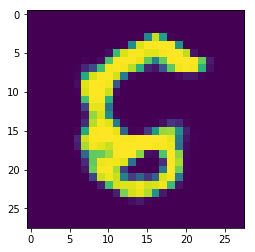

In [0]:
noise = np.random.uniform(-1.0, 1.0, size=[16, 100])
images=mnist_dcgan.generator.predict(noise)
image=images[1,:,:,:]
image=np.reshape(image,[28,28])
plt.imshow(image)
plt.show()

In [0]:
mnist_dcgan.generator.save("mnist_gan.hdf5")

In [0]:
from google.colab import files

In [0]:
files.download("mnist_gan.hdf5")